# Pyam Integration

*Note: This notebook will eventually show how OpenSCM integrates with Pyam. For now it simply shows the ScmDataFrame is also compatible with pyam data.*

Here we make use of the direct connection to the IIASA database made available in Pyam.

In [1]:
# NBVAL_IGNORE_OUTPUT
import pyam
import seaborn as sns
sns.set(style="darkgrid")

from openscm.highlevel import ScmDataFrame

<IPython.core.display.Javascript object>

Not importing directory /home/jared/code/uom/openscm/venv/lib/python3.6/site-packages/sphinxcontrib: missing __init__
Not importing directory /home/jared/code/uom/openscm/venv/lib/python3.6/site-packages/mpl_toolkits: missing __init__


In [2]:
df_pyam = pyam.read_iiasa_iamc15(
    model="MESSAGEix*", 
    variable=["Emissions*"], 
)
df = ScmDataFrame(df_pyam.data)

INFO:root:You are connected to the iamc15 scenario explorer. Please cite as:

D. Huppmann, E. Kriegler, V. Krey, K. Riahi, J. Rogelj, S.K. Rose, J. Weyant, et al., IAMC 1.5C Scenario Explorer and Data hosted by IIASA. IIASA & IAMC, 2018. doi: 10.22022/SR15/08-2018.15429, url: data.ene.iiasa.ac.at/iamc-1.5c-explorer


In [3]:
type(df)

openscm.highlevel.ScmDataFrame

Wrapping around IamDataFrame provides many great data exploration and usage tools.

In [4]:
df['variable'].unique()

array(['Emissions|BC', 'Emissions|CH4', 'Emissions|CH4|AFOLU',
       'Emissions|CH4|Energy', 'Emissions|CO2', 'Emissions|CO2|AFOLU',
       'Emissions|CO2|Energy',
       'Emissions|CO2|Energy and Industrial Processes',
       'Emissions|CO2|Energy|Demand',
       'Emissions|CO2|Energy|Demand|Industry',
       'Emissions|CO2|Energy|Supply',
       'Emissions|CO2|Energy|Supply|Electricity', 'Emissions|F-Gases',
       'Emissions|Kyoto Gases', 'Emissions|N2O', 'Emissions|N2O|AFOLU',
       'Emissions|N2O|Energy', 'Emissions|Sulfur',
       'Emissions|Kyoto Gases (AR4-GWP100)',
       'Emissions|Kyoto Gases (AR5-GWP100)',
       'Emissions|Kyoto Gases (SAR-GWP100)', 'Emissions|CO',
       'Emissions|HFC', 'Emissions|NH3', 'Emissions|NOx', 'Emissions|OC',
       'Emissions|PFC', 'Emissions|SF6', 'Emissions|VOC'], dtype=object)

In [5]:
df['region'].unique()

array(['R5ASIA', 'R5LAM', 'R5MAF', 'R5OECD90+EU', 'R5REF', 'World'],
      dtype=object)

In [6]:
df['scenario'].unique()

array(['CD-LINKS_INDCi', 'CD-LINKS_NPi', 'CD-LINKS_NPi2020_1000',
       'CD-LINKS_NPi2020_1600', 'CD-LINKS_NPi2020_400',
       'CD-LINKS_NoPolicy', 'LowEnergyDemand'], dtype=object)

In [7]:
df.meta.columns

Index(['model', 'scenario', 'region', 'variable', 'unit'], dtype='object')

Pyam's plotting functions provide great defaults for making all sorts of informative plots.

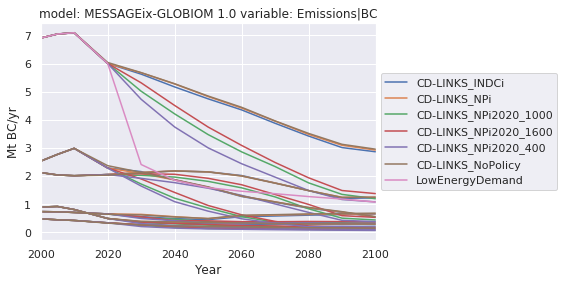

In [8]:
# NBVAL_IGNORE_OUTPUT
df.filter(variable='Emissions|BC').to_iamdataframe().line_plot(
    color='scenario', 
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
);

The use of a PandasDataFrame underneath the hood makes integration with other tools, like seaborn, trivial.

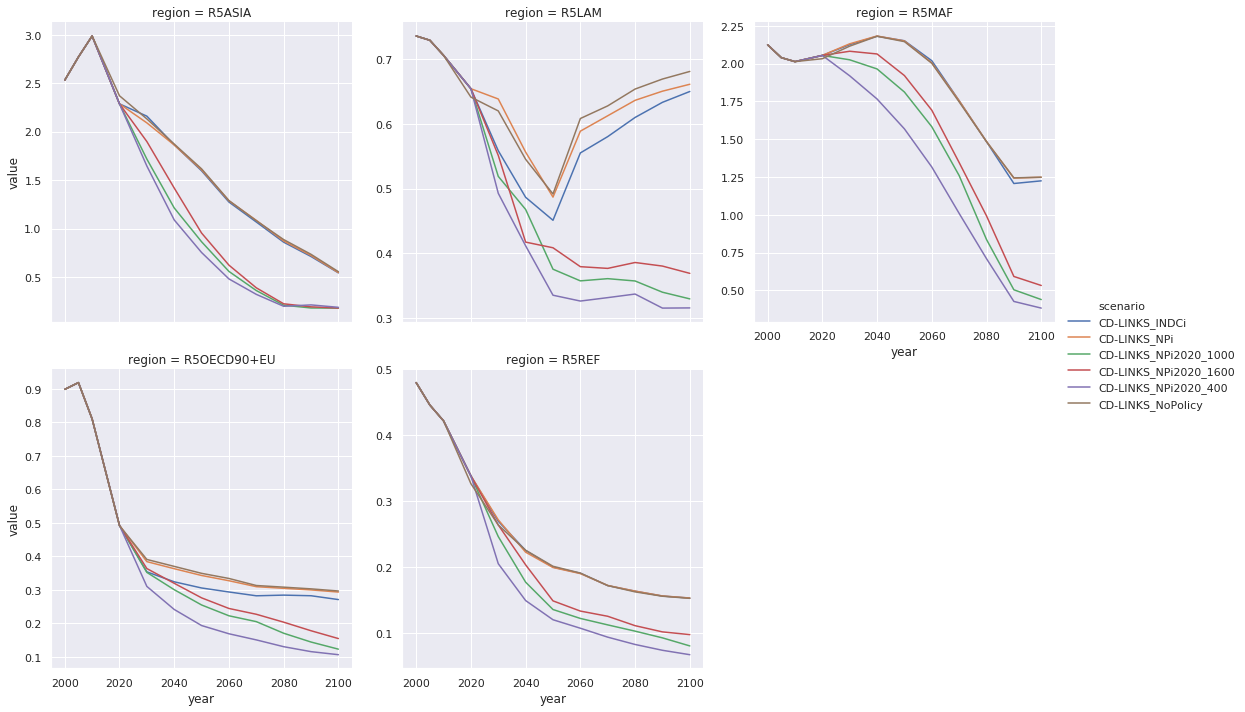

In [9]:
emissions_bc = df.filter(
    variable="Emissions|BC"
).filter(
    region="World",
    keep=False
).to_iamdataframe().data
sns.relplot(
    x="year",
    y="value",
    kind="line",
    col="region",
    col_wrap=3,
    hue="scenario",
    data=emissions_bc,
    ci=None,
    facet_kws={"sharey": False},
);